The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


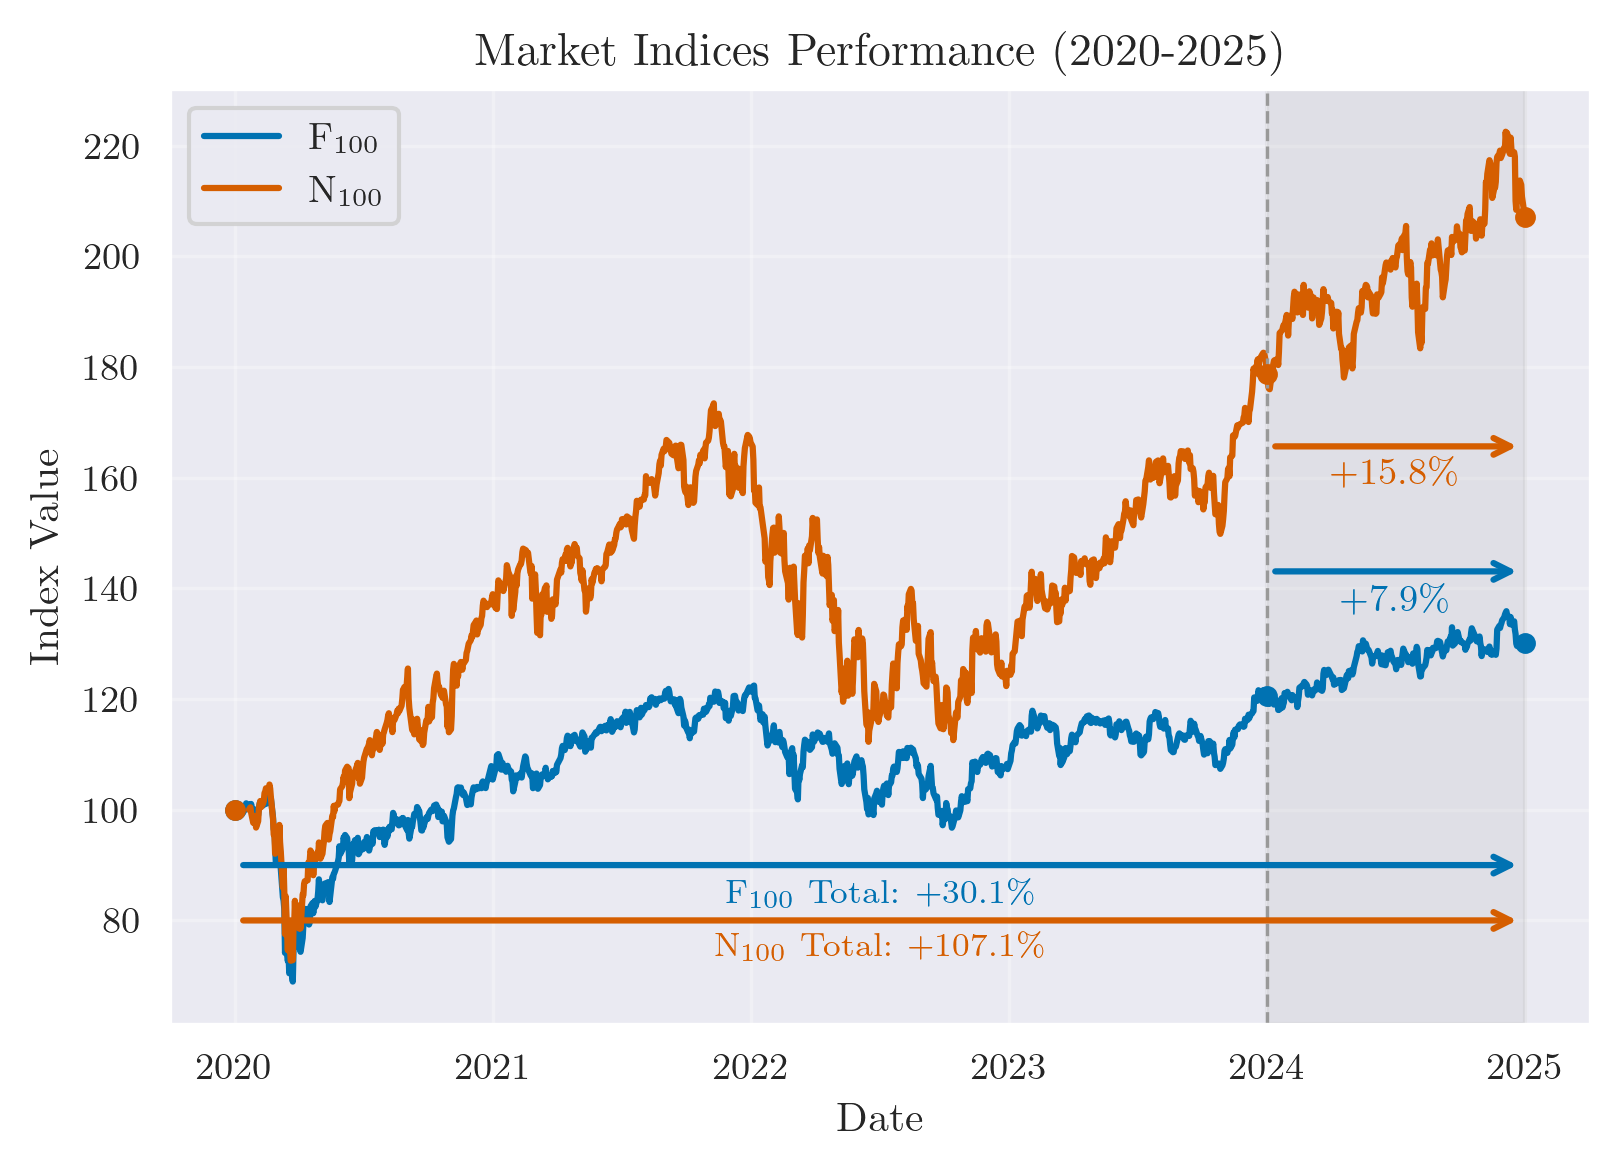

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import numpy as np
import matplotlib as mpl

# Configure matplotlib for scientific paper style
plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Computer Modern Roman'],
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 11,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9,
    'text.usetex': True,
    'figure.figsize': (5.5, 4),
    'figure.dpi': 300,
    'savefig.dpi': 300,
    'savefig.format': 'pdf',
    'savefig.bbox': 'tight',
    'axes.grid': True,
    'grid.alpha': 0.3,
    'lines.linewidth': 1.5,
})

# Load market data
df1 = load_market_data('../../data/raw/ftse_daily.parquet')
df2 = load_market_data('../../data/raw/nasdaq_daily.parquet')

# Create market indices function
def create_index(df, name):
    df['date'] = pd.to_datetime(df['date'])
    index = df.groupby('date')['close'].mean().reset_index()
    
    start_date = pd.to_datetime('2020-01-01')
    end_date = pd.to_datetime('2025-01-01')
    index = index[(index['date'] >= start_date) & (index['date'] <= end_date)]
    
    base_value = index.iloc[0]['close']
    index['value'] = (index['close'] / base_value) * 100
    
    return index

# Process data
ftse = create_index(df1, 'FTSE')
nasdaq = create_index(df2, 'NASDAQ')

# Key dates
start_date = pd.to_datetime('2020-01-01')
mid_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2025-01-01')

# Calculate growth metrics
def calc_growth(df, start_date, end_date):
    start_val = df[df['date'] >= start_date].iloc[0]['value']
    end_val = df[df['date'] <= end_date].iloc[-1]['value']
    return ((end_val / start_val) - 1) * 100

# Calculate total and 2024 growth for each index
ftse_total = calc_growth(ftse, start_date, end_date)
ftse_2024 = calc_growth(ftse, mid_date, end_date)
nasdaq_total = calc_growth(nasdaq, start_date, end_date)
nasdaq_2024 = calc_growth(nasdaq, mid_date, end_date)

# Get values at key dates for annotations
ftse_start = ftse[ftse['date'] >= start_date].iloc[0]['value']
ftse_mid = ftse[ftse['date'] >= mid_date].iloc[0]['value']
ftse_end = ftse[ftse['date'] <= end_date].iloc[-1]['value']

nasdaq_start = nasdaq[nasdaq['date'] >= start_date].iloc[0]['value']
nasdaq_mid = nasdaq[nasdaq['date'] >= mid_date].iloc[0]['value']
nasdaq_end = nasdaq[nasdaq['date'] <= end_date].iloc[-1]['value']

# Create plot with scientific publication style
fig, ax = plt.subplots(figsize=(5.5, 4))

# Set professional colors suitable for publication
ftse_color = '#0072B2'  # Dark blue
nasdaq_color = '#D55E00'  # Dark orange/red

# Plot the data
ax.plot(ftse['date'], ftse['value'], color=ftse_color, label='F$_{100}$')
ax.plot(nasdaq['date'], nasdaq['value'], color=nasdaq_color, label='N$_{100}$')

# Add 2024 marker without label
ax.axvline(x=mid_date, color='#999999', linestyle='--', linewidth=0.8)

# Highlight 2024-2025 period with subtle shading
ax.axvspan(mid_date, end_date, alpha=0.1, color='gray')

# Add horizontal arrows for total growth with vertical offsets (2020-2025)
# FTSE total growth arrow - positioned below baseline
ftse_total_offset = ftse_start * 0.9  # Positioned below the starting value
ax.annotate('', 
            xy=(end_date, ftse_total_offset), 
            xytext=(start_date, ftse_total_offset),
            arrowprops=dict(arrowstyle='->', color=ftse_color, linewidth=1.5))
ax.text((start_date + (end_date - start_date)/2), ftse_total_offset*0.97, 
        f'F$_{{100}}$ Total: +{ftse_total:.1f}\\%', 
        ha='center', va='top', color=ftse_color, fontsize=8)

# NASDAQ total growth arrow - positioned further below
nasdaq_total_offset = nasdaq_start * 0.8  # Positioned even lower
ax.annotate('', 
            xy=(end_date, nasdaq_total_offset), 
            xytext=(start_date, nasdaq_total_offset),
            arrowprops=dict(arrowstyle='->', color=nasdaq_color, linewidth=1.5))
ax.text((start_date + (end_date - start_date)/2), nasdaq_total_offset*0.97, 
        f'N$_{{100}}$ Total: +{nasdaq_total:.1f}\\%', 
        ha='center', va='top', color=nasdaq_color, fontsize=8)

# Reposition the 2024-2025 growth arrows to avoid chart overlap
# FTSE 2024-2025 growth arrow - horizontal from 2024 to 2025
ftse_2024_offset = ftse_end * 1.10  # Position above the end point
ax.annotate('', 
            xy=(end_date, ftse_2024_offset), 
            xytext=(mid_date, ftse_2024_offset),
            arrowprops=dict(arrowstyle='->', color=ftse_color, linewidth=1.5))
ax.text((mid_date + (end_date - mid_date)/2), ftse_2024_offset*0.94, 
        f'+{ftse_2024:.1f}\\%', 
        ha='center', va='bottom', color=ftse_color, fontweight='bold', fontsize=9)

# NASDAQ 2024-2025 growth arrow - horizontal from 2024 to 2025
nasdaq_2024_offset = nasdaq_end * 0.80  # Position below the end point
ax.annotate('', 
            xy=(end_date, nasdaq_2024_offset), 
            xytext=(mid_date, nasdaq_2024_offset),
            arrowprops=dict(arrowstyle='->', color=nasdaq_color, linewidth=1.5))
ax.text((mid_date + (end_date - mid_date)/2), nasdaq_2024_offset*0.987, 
        f'+{nasdaq_2024:.1f}\\%', 
        ha='center', va='top', color=nasdaq_color, fontweight='bold', fontsize=9)

# Formatting
ax.set_title('Market Indices Performance (2020-2025)', fontsize=11)
ax.set_xlabel('Date')
ax.set_ylabel('Index Value')

# Set x-axis ticks to yearly
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Add markers at key points
ax.plot(start_date, ftse_start, 'o', color=ftse_color, markersize=4)
ax.plot(mid_date, ftse_mid, 'o', color=ftse_color, markersize=4)
ax.plot(end_date, ftse_end, 'o', color=ftse_color, markersize=4)
ax.plot(start_date, nasdaq_start, 'o', color=nasdaq_color, markersize=4)
ax.plot(mid_date, nasdaq_mid, 'o', color=nasdaq_color, markersize=4)
ax.plot(end_date, nasdaq_end, 'o', color=nasdaq_color, markersize=4)

# Add legend
ax.legend(loc='upper left')

# Ensure tight layout and proper sizing
plt.tight_layout()

# Save figure in formats suitable for LaTeX
plt.savefig('market_comparison.pdf', bbox_inches='tight')
plt.savefig('market_comparison.eps', format='eps', bbox_inches='tight')
plt.savefig('market_comparison.png', dpi=300, bbox_inches='tight')

plt.show()